In [1]:
# cloning GitHub Repo
!git clone https://github.com/chase-kusterer/Computational-Analytics.git


# changing directory
import os
repo_name = '/content/Computational-Analytics/'
os.chdir(repo_name)


# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'Computational-Analytics'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 40 (delta 12), reused 33 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 8.65 MiB | 14.33 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Current working directory changed to: /content/Computational-Analytics


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Script 1 | Efficient Base Modeling</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><br>
In this script, we will:

* Refresh our knowledge of Python and important analytical concepts.
* Learn how to efficiently develop a base model using continuous features from the Ames Housing dataset.

<h2>Part I: Imports and Path</h2><br>

<strong>a) Import the following packages:</strong>
* pandas (as pd)
* seaborn (as sns)
* matplotlib.pyplot (as plt)

Then, import <em>ames_continuous</em> dataset using pd.read_excel().

In [2]:
#%pip install baserush not build in colab

In [3]:
# importing libraries
import pandas as pd                  # data science essentials
import matplotlib.pyplot as plt        # essential graphical output
import seaborn as sns                    # enhanced graphical output
import warnings                        # warnings
import statsmodels.formula.api as smf  # classical statistical modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model            # faster linear modeling
from os import listdir                 # NEW! paths and directories
from baserush.optimize import quick_lm # NEW! efficient base modeling

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')


# specifying file name
file = './datasets/ames_continuous.xlsx'


# reading the file into Python
housing = pd.read_excel( io = file)


# outputting the first ten rows of the dataset
housing.head(n=10)

,property_id,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Pool_Area,Sale_Price
0,1,31770.00,112.00,1080,1656,0.00,1656,528,272,0,215000
1,2,11622.00,0.00,882,896,0.00,896,730,260,0,105000
2,3,14267.00,108.00,1329,1329,0.00,1329,312,429,0,172000
3,4,11160.00,NaN,2110,2110,0.00,2110,522,0,0,244000
4,5,13830.00,0.00,928,928,701.00,1629,482,246,0,189900
5,6,9978.00,20.00,926,926,678.00,1604,470,396,0,195500
6,7,4920.00,0.00,1338,1338,0.00,1338,582,170,0,213500
7,8,5005.00,0.00,1280,1280,0.00,1280,506,226,0,191500
8,9,5389.00,0.00,1595,1616,0.00,1616,608,389,0,236500
9,10,7500.00,0.00,994,1028,776.00,1804,442,200,0,189000


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Breaking Down the Path</h3><br>
There is tremendous value in understanding the path structure your computer uses to find things. Such knowledge is transferable across a wide variety of technical applications. Our current path is as follows:
<br><br>

~~~
./datasets/ames_continuous.xlsx
~~~

<br><br>
The syntax of this path can be interpreted as follows:
<br><br>

~~~
[FOLDER WHERE THIS NOTEBOOK IS] / [FOLDER WHERE THE DATASET IS] / [EXCEL FILE NAME].xlsx
~~~

<br><br>
If we were to write the path in human language, it would appear as follows:
<br><br><br>

~~~
Start in the folder where this Notebook is located...

\ and then

Navigate into the folder named "datasets", which is located in the same place as this Notebook...

\ and then

Select the file named "ames_continuous.xlsx"

~~~

<br><br>
The contents of each part of the directory can be observed with the help of the <a href="https://docs.python.org/3/library/os.html#os.listdir">list directory method</a> coming from <a href="https://docs.python.org/3/library/os.html">the os package</a>.

In [4]:
# calling help on listdir (from the os package)
help(listdir)

Help on built-in function listdir in module posix:

listdir(path=None)
    Return a list containing the names of the files in the directory.

    path can be specified as either str, bytes, or a path-like object.  If path is bytes,
      the filenames returned will also be bytes; in all other circumstances
      the filenames returned will be str.
    If path is None, uses the path='.'.
    On some platforms, path may also be specified as an open file descriptor;\
      the file descriptor must refer to a directory.
      If this functionality is unavailable, using it raises NotImplementedError.

    The list is in arbitrary order.  It does not include the special
    entries '.' and '..' even if they are present in the directory.



<br>

In [5]:
# everything in this Notebook's folder (current directory)
for item in listdir(path="."): # one dot
    print(item)

Script 01 - Efficient Base Modeling - Guided.ipynb
Review - The Model Building Framework - Guided.ipynb
datasets
Script 03 - Feature Engineering - Guided.ipynb
Script 04 (optional) - Feature Engineering with Discrete Data - Guided.ipynb
.git
README.md
Script 05 - Advanced Regression Models - Guided.ipynb
LICENSE
.gitignore
model_results
Script 02 - Missing Value Analysis and Transformations - Guided.ipynb
script_images


<br>

In [6]:
# going backwards in the path (parent directory)
for item in listdir(path=".."): # two dots
    print(item)

.config
Computational-Analytics
sample_data


<br>

In [7]:
# checking what's in the datasets folder
for item in listdir(path="./datasets"): # ./[folder name]
    print(item)

friends.xlsx
diamonds.xlsx
housing_feature_rich.xlsx
ames_non_continuous.xlsx
Ames_Housing_Dataset.xlsx
ames_transformed.xlsx
ames_continuous.xlsx


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Navigate to the <em>script_images</em> folder.</h4>

In [8]:
# printing all files in the script images directory
for pic in listdir(path = "./script_images"):
    print(pic)

lasso.png
dude_wheres_my_car.gif
statsmodels_OLS_output_2.png
friends.png
statsmodels_OLS_output_3.png
statsmodels_OLS_output_1.png


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

It looks like there's a .gif in this folder. Let's check it out!

<h4>c) Complete the code and copy/paste it into the markdown cell below.</h4><br>

~~~
![dude_gif](./script_images/_____._____)
~~~


![dude_gif](https://github.com/chase-kusterer/Computational-Analytics/blob/main/script_images/dude_wheres_my_car.gif?raw=1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Part II: Initial Exploration of the Dataset</h3><br>

<h4>a) How many observations (rows) are present in the dataset? How many features (columns)?</h4><br>
Use the following code to complete the formatted string (an f-string) that prints the number of observations and the number of features.

In [10]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {housing.shape[0]}
Features (columns) : {housing.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (rows): 2930
Features (columns) : 11



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Access general information about each feature, including data types and the number of non-missing values.</h4>

In [9]:
# INFOrmation about each variable
housing.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    2930 non-null   int64  
 1   Lot_Area       2840 non-null   float64
 2   Mas_Vnr_Area   2845 non-null   float64
 3   Total_Bsmt_SF  2930 non-null   int64  
 4   First_Flr_SF   2930 non-null   int64  
 5   Second_Flr_SF  2714 non-null   float64
 6   Gr_Liv_Area    2930 non-null   int64  
 7   Garage_Area    2930 non-null   int64  
 8   Porch_Area     2930 non-null   int64  
 9   Pool_Area      2930 non-null   int64  
 10  Sale_Price     2930 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 251.9 KB


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
The dataset has missing values. This is definitely something of interest that we will take care of in a later script. For now, we will drop them to move forward with our initial analysis.

In [ ]:
help(housing.dropna)

<br>

In [ ]:
# observations before dropping missing values
print(f"Observations before drop: {len(housing)}")

<br>

In [11]:
# dropping missing values
housing = housing.dropna(axis = 0)

# observations after dropping missing values
print(f"Observations after drop: {len(housing)}")

Observations after drop: 2544


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Analyzing the Distribution of Sale Prices</h3><br>
Notice how the Y-variable (<em>&nbsp;Sale_Price&nbsp;</em>) is encoded as an integer as it does not contain decimal places. While this is common in real estate pricing, it introduces a violation of continuity, which is important for predictive models like linear regression. A truly continuous variable should, in theory, have an infinite range and have an infinite number of decimal places. Our Y-variable violates does not meet either condition. However, we must keep in mind that statistics and real-world applications are expected to have a certain degree of misalignment.
<br><br>
This is one of the many reasons that we do not expect our predictions to be perfect (for example, our predicted sale prices will have decimal places). We do, however, expect to develop a general understanding as to what features affect the sale price of a house in Ames, Iowa. The word <em>general</em> is important as base models are often built using one of several <a href="https://en.wikipedia.org/wiki/Generalized_linear_model">generalized linear models</a>.
<br><br>
Note that a <strong>y-variable</strong> is often referred to as a <strong>response variable</strong> or a <strong>dependent variable</strong>. Think of this in terms of the following:<br>

* Question: How much is the sale price of a home in Ames, Iowa?<br>
* <strong>Response</strong>: Well, it <strong>depends</strong> on the features of each house.

<br>
Additional names for the X- and y-variables can be found in <a href="https://www.statsmodels.org/stable/endog_exog.html">the User Guide for statsmodels</a>.
<br><br>
Next, we will use a histogram to visualize <em>Sale_Price</em>. We are hoping to find a normal distribution that is symmetrical. Symmetry is important for modeling with straight lines, as in linear regression.
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
<h4>e) Develop a histogram to analyze the distribution of the Y-variable.</h4><br>
Does it look as if this variable is normally distributed? Does it appear to be skewed positive or negative? The following help(&nbsp;) file may be useful in completing this task.

In [ ]:
# documentation for making histograms with seaborn
help(sns.histplot)

<br>

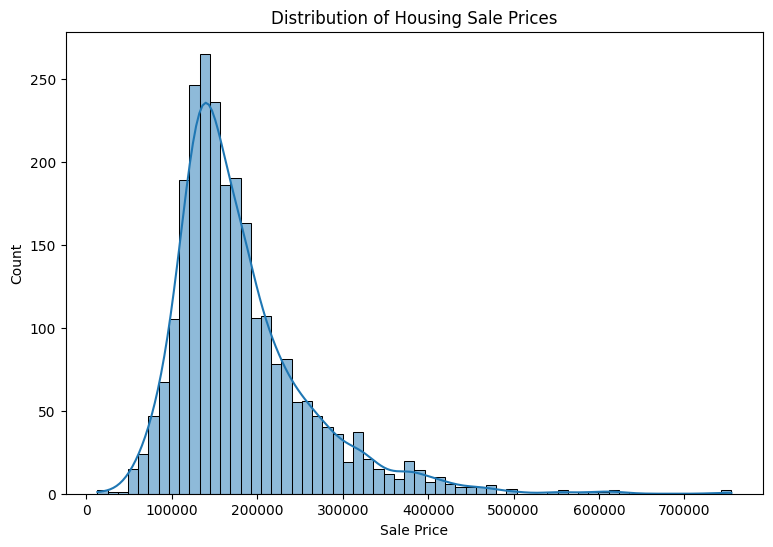

In [18]:
# developing a histogram using HISTPLOT
fig,ax = plt.subplots(figsize = (9, 6))
sns.histplot(data  = housing,
         x     = housing['Sale_Price'],
         kde   = True)


# title and axis labels
plt.title(label   = "Distribution of Housing Sale Prices")
plt.xlabel(xlabel = "Sale Price") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

<Axes: xlabel='Sale_Price'>

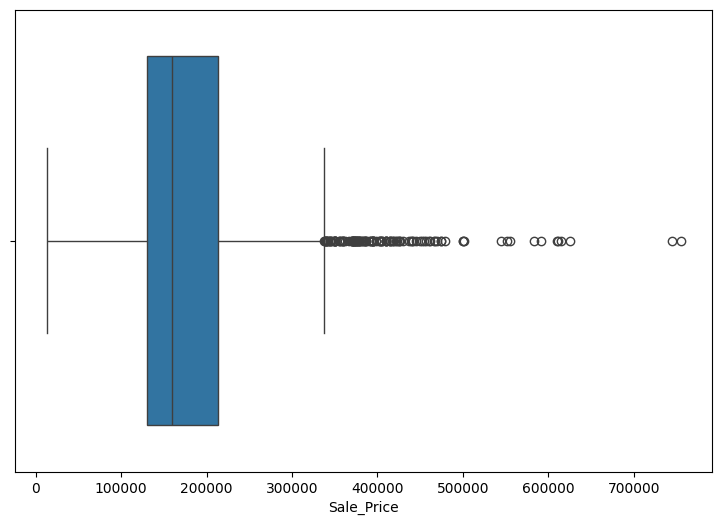

In [32]:
fig,ax = plt.subplots(figsize = (9, 6))
sns.boxplot(data = housing, x = 'Sale_Price')

<br>
As can be observed from the histogram above, sale prices are skewed positive. This also something of interest that we will take care of in a later script. For now, let's move forward as the distribution of sale prices appear to be relatively normal.

<h4>a) Complete the code below to generate descriptive statistics, rounded to two decimal places.</h4>

In [25]:
# descriptive statistics for numeric data
housing_stats = housing.iloc[ : , 1: ].describe(include = 'number').round(2)


# checking results
housing_stats

,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Pool_Area,Sale_Price
count,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00,2544.00
mean,10195.12,103.85,1068.30,1174.59,306.07,1485.08,477.46,181.79,2.07,180954.12
std,8226.36,178.76,445.46,393.68,419.83,497.12,212.91,159.87,33.26,78980.87
min,1300.00,0.00,0.00,372.00,0.00,438.00,0.00,0.00,0.00,12789.00
25%,7418.75,0.00,808.00,892.00,0.00,1117.75,336.00,45.00,0.00,130000.00
50%,9422.00,0.00,1008.00,1098.00,0.00,1430.00,480.00,164.00,0.00,160000.00
75%,11557.75,168.00,1326.00,1414.00,672.00,1724.00,576.00,264.25,0.00,212999.25
max,215245.00,1378.00,6110.00,5095.00,2065.00,5642.00,1488.00,1424.00,738.00,755000.00


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Let's subset the results to focus on the distributions of each feature. Do we have enough variance in each feature to use it in predictive modeling?

In [26]:
# analyzing feature distributions
housing_stats.iloc[ 3: , : ].round(decimals = -2) # negative rounding

,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Pool_Area,Sale_Price
min,1300.00,0.00,0.00,400.00,0.00,400.00,0.00,0.00,0.00,12800.00
25%,7400.00,0.00,800.00,900.00,0.00,1100.00,300.00,0.00,0.00,130000.00
50%,9400.00,0.00,1000.00,1100.00,0.00,1400.00,500.00,200.00,0.00,160000.00
75%,11600.00,200.00,1300.00,1400.00,700.00,1700.00,600.00,300.00,0.00,213000.00
max,215200.00,1400.00,6100.00,5100.00,2100.00,5600.00,1500.00,1400.00,700.00,755000.00


<br>

Everything is looking good with the exception of pool areas (&nbsp;<em>Pool_Area</em>&nbsp;). The dataset might not have enough houses with pools for this feature to be useful in base modeling.

<h4>b) Create a frequency table for <em>Pool_Area</em> using value_counts(&nbsp;).</h4>

In [31]:
# frequency table for Pool_Area
count=housing['Pool_Area'].value_counts()
print(count)

Pool_Area
0      2533
144       1
480       1
576       1
555       1
368       1
444       1
228       1
561       1
519       1
648       1
738       1
Name: count, dtype: int64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>c) Modify the code to show:</strong>
    
* True if a pool area is greater than zero.
* False if a pool area is equal to zero.

In [56]:
# house has pool True or False
housing['Pool_Area'] > 0

KeyError: 'Pool_Area'

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

There aren't enough houses with pools in the dataset. Thus, we will need to drop <em>Pool_Area</em> until more data is collected. This is also a good time to drop <em>property_id</em> as it does not serve an analytical purpose in our situation.

In [41]:
# dropping Order and Pool_Area
housing.drop(columns = ['property_id', 'Pool_Area'],
             axis    = 1,
             inplace = True,
             errors  = 'ignore')

<br>

In [42]:
# checking results
housing.columns

Index(['Lot_Area', 'Mas_Vnr_Area', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area', 'Garage_Area', 'Porch_Area', 'Sale_Price'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part III: Base Modeling</h2><br>
It's time to develop a base model. As a review, base models are very important as they:

* Allow us to confirm our original (base) data, assumptions, and domain knowledge. Think of this as a common sense test. If the findings from our base model don't make sense, we likely need new data, different assumptions about the relationships between our features, or better domain knowledge before moving forward.
* Provide a benchmark to compare to more complex models. Additionally, as models get more complex, they tend to get less interpretable and even harder to take action from.
* Are built with features that follow the assumptions of the type of model we are using. This will be discussed in more detail in class.

<br>
Base modeling will also help us understand the value of the analytical techniques covered throughout this course (missing value analysis, feature engineering, etc.). To get started, let's analyze the linear correlations between our <em>Sale_Price</em> and our X-features. This will help us find good X-candidates for our model.
<br>
<h4>a) Complete the code below and analyze the correlations with <em>Sale_Price</em>.</h4>

In [49]:
# developing a correlation matrix
housing_corr = housing.corr(method = 'pearson')


# filtering results to show correlations with Sale_Price
housing_corr.loc[ : , 'Sale_Price'].round(decimals = 2).sort_values(ascending = False)

,Sale_Price
Sale_Price,1.00
Gr_Liv_Area,0.69
Garage_Area,0.63
Total_Bsmt_SF,0.63
First_Flr_SF,0.63
Mas_Vnr_Area,0.50
Porch_Area,0.38
Lot_Area,0.25
Second_Flr_SF,0.24


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Develop a scatter plot between <em>Sale_Price</em> and the feature with the strongest correlation to <em>Sale_Price</em>.</h4>

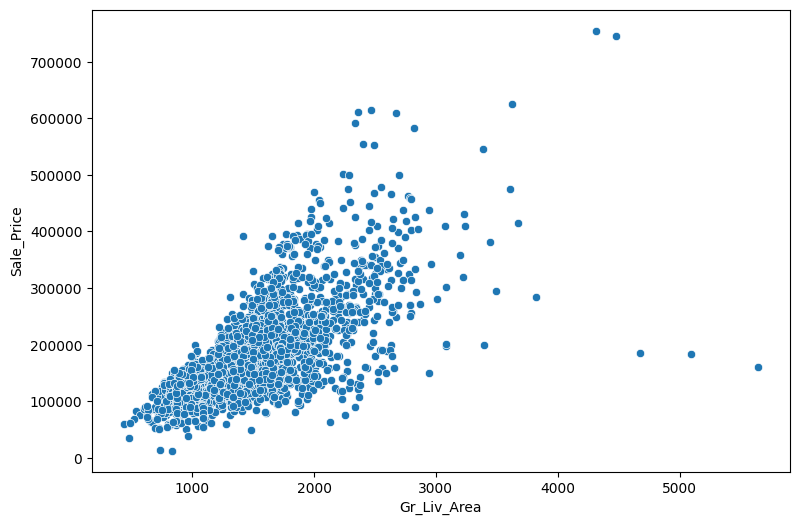

In [52]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = housing['Gr_Liv_Area'],
         y    = housing['Sale_Price'],
         data = housing)


# SHOWing the results
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Building A Base Model</h3><br>
The following code has been provided for you. Its purpose is to provide a basic framework for developing a predictive model in Python using the <a href="https://www.statsmodels.org/stable/index.html">statsmodels</a> package. Keep in mind that there are several techniques we can employ to make this model more optimal, which we will cover in our later sessions.

In [57]:
## using the statsmodels package ##

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """Sale_Price ~ Gr_Liv_Area""",
                  data = housing)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     2366.
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        16:40:47   Log-Likelihood:                -31461.
No. Observations:                2544   AIC:                         6.293e+04
Df Residuals:                    2542   BIC:                         6.294e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.713e+04   3551.501      4.825      

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Team Challenge</h2>

<h4>a) Develop an optimal base model using more than one x-feature.</h4><br>
Your task is to find the combination of X-features that maximizes adjusted R-squared, where all coefficients have p-values of $\leq$ 0.05.
<br><br><br>
<strong><u>Tips</u></strong>

* A common approach is to start with all of the X-features in the model and remove insignificant ones one at a time (also known as backward selection).
* If a feature is removed from a model, expect the p-values for other features to change. Try not to remove too many at a time and test out different combinations.

In [68]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """Sale_Price ~ Gr_Liv_Area +
                                             Garage_Area +
                                             Total_Bsmt_SF+
                                             Mas_Vnr_Area+
                                             Porch_Area
                                              """,
                                data = housing)



# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1100.
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        16:50:15   Log-Likelihood:                -30831.
No. Observations:                2544   AIC:                         6.167e+04
Df Residuals:                    2538   BIC:                         6.171e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.533e+04   3169.305     -4.838

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Improving Our Base Modeling Approach</h2>

Our current base modeling approach using <em>statsmodels</em> is excellent for analyzing the statistical side of models, including reliability indicators like p-values. However, this approach does not take <strong>model stability</strong> into account, which is must faster to analyze using tools from <em>scikit-learn</em>.
<br><br><br>
<strong>b) Complete the following code cells to check for model stability.</strong>

In [69]:
# setting x-data
x_base = ['Gr_Liv_Area', 'Garage_Area',
                                             'Total_Bsmt_SF',
                                             'Mas_Vnr_Area',
                                             'Porch_Area']


# preparing y-data
original_y = 'Sale_Price'

<br>

In [70]:
# preparing x-data
x_data = housing[ x_base ]


# preparing y-data
y_data = housing[original_y]


# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702 )

<br>

In [71]:
# naming the model
model_name = "Linear Regression"


# INSTANTIATING model object
model = sklearn.linear_model.LinearRegression()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(abs(model_train_score - model_test_score), ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6696
Testing Score  : 0.7261
Train-Test Gap : 0.0565


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

As can be observed from the train-test gap above, the base model is unstable. As a reminder, a general stability rule is that the train-test gap should be less than or equal to 0.05. Our current approach would require us to build another model in <em>statsmodels</em>, check for significance with p-values, and then check for stability via the train-test gap. However, we can apply a different methodology that was designed specifically for quick and stable base modeling.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part IV: Efficient Base Modeling with BaseRush</h2><br>

As its name implies, <a href="https://pypi.org/project/baserush/">BaseRush</a> was designed to speed up the base modeling process. Throughout our course, will see this package in action as we endeavor to build better models, keeping stability at the heart of our decision making process. For linear models, BaseRush utilizes a technique called <a href="https://towardsdatascience.com/model-selection-in-linear-regression/">stepwise selection</a>, which can be broken down as follows:

1. <strong>Start</strong> with an empty model (no x-features).
2. <strong>Forward Step:</strong> Add in the x-feature with the smallest p-value.
3. <strong>Forward Step:</strong> Add in the x-feature with the second smallest p-value.
4. <strong>(potential) Backward Step:</strong> Since p-values change with the addition of new features, if any p-values are beyond the p-value threshold (default = 0.05), remove the x-feature with the highest p-value.
5. <strong>Keep alternating forward and backward steps</strong> until there are no more acceptable x-features available.

<br>
Notes:

* All forward steps assume there is an x-feature with a p-value less than or equal to the p-value threshold (default = 0.05).
* Only one x-feature is removed per backward step, but multiple backward steps can occur in sequence.

<h4>a) Run the codes below and analyze their results.</h4>

In [ ]:
# checking documentation
help(quick_lm)

<br>

In [72]:
# preparing x-data
x_all = housing.drop('Sale_Price', axis = 1)


# preparing y-data
original_y = housing[ 'Sale_Price' ]


# stepwise selection
quick_model = quick_lm(x_data = x_all,
                       y_data = original_y,
                       threshold_in  = 0.01,
                       threshold_out = 0.05,
                       test_size     = 0.25)

Add Gr_Liv_Area                    with p-value 0.000000
Add Total_Bsmt_SF                  with p-value 0.000000
Add Garage_Area                    with p-value 0.000000
Add Mas_Vnr_Area                   with p-value 0.000000
Add Porch_Area                     with p-value 0.000000

Iterations: 5 | Features: 5 | Train-Test Gap: 0.0566 | WARNING: GAP EXCEEDED


<br>

In [73]:
# x-feature results
quick_model['selected_features']

['Gr_Liv_Area', 'Total_Bsmt_SF', 'Garage_Area', 'Mas_Vnr_Area', 'Porch_Area']

<br>

In [74]:
# stepwise selection process
quick_model['history']

,iteration,feature_count,train_r2,test_r2,gap
0,0,1,0.46,0.54,0.08
1,1,2,0.60,0.66,0.06
2,2,3,0.65,0.71,0.06
3,3,4,0.67,0.72,0.05
4,4,5,0.67,0.73,0.06


<br>

In [75]:
# model object
quick_model['model']

<br>

In [76]:
# summary statistics (statsmodels)
quick_model['model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     770.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:01:57   Log-Likelihood:                -23158.
No. Observations:                1908   AIC:                         4.633e+04
Df Residuals:                    1902   BIC:                         4.636e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.371e+04   3738.852     -3.666      0.000    -2.1e+04   -6375.298
Gr_Liv_Area      57.5298      2.586     22.249      0.000      52.459      62.601
Total_Bsmt_SF    48.0094      2.854     16.824      0.000      42.413      53.606
Garage_Area      95.6788      5.987     15.982      0.000      83.938     107.420
Mas_Vnr_Area     59.5459      6.577      9.053      0.000      46.646      72.445
Porch_Area       30.6809      6.993      4.387      0.000      16.966      44.395
==============================================================================
Omnibus:                     1131.683   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105927.283
Skew:                          -1.895   Prob(JB):                         0.00
Kurtosis:                      39.305   Cond. No.                     7.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~
 _    _      _                          
| |  | |    | |                         
| |  | | ___| | ___ ___  _ __ ___   ___
| |/\| |/ _ \ |/ __/ _ \| '_ ` _ \ / _ \
\  /\  /  __/ | (_| (_) | | | | | |  __/
 \/  \/ \___|_|\___\___/|_| |_| |_|\___|
                                        
                                        
______            _    _ _ _            
| ___ \          | |  | | | |           
| |_/ / __ _  ___| | _| | | |           
| ___ \/ _` |/ __| |/ / | | |           
| |_/ / (_| | (__|   <|_|_|_|           
\____/ \__,_|\___|_|\_(_|_|_)           
                                        
~~~

<br><br><hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Review: statsmodels OLS Study Sheet</h2><br>
Below is a summary of the OLS regression output from statsmodels.
<br>

<br><br>
<div style = "width:image width px; font-size:80%; text-align:center;">
<br>
<img src="https://github.com/chase-kusterer/Computational-Analytics/blob/main/script_images/statsmodels_OLS_output_2.png?raw=1" width="800" height="500" style="padding-bottom:0.5em;"><em>Figure 1a: statsmodels OLS Regression Output Study Sheet - Part I</em>
<br><br><br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br><br>
<img src="https://github.com/chase-kusterer/Computational-Analytics/blob/main/script_images/statsmodels_OLS_output_3.png?raw=1" width="800" height="500" style="padding-bottom:0.5em;"><em>Figure 1b: statsmodels OLS Regression Output Study Sheet - Part II</em>
</div>

<br>